In [1]:
# Create a model that can predict that the customer has purchased item or not based on features given in the dataset.
# Use appropriate evaluation metrics. Dataset : Social_Ntetwork_Ads.csv

# Logistic Regression - Customer Purchase Prediction


In [3]:
# Importing Dependencies   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)

In [4]:

# Step 1: Load dataset
data = pd.read_csv("Social_Network_Ads.csv")


In [6]:
data.head()
data.info()
data.isnull().sum()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
# Step 2: Select features (Age, EstimatedSalary) and target (Purchased)
X = data[["Age", "EstimatedSalary"]]
y = data["Purchased"]


In [8]:
# Step 3: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

In [11]:
# Step 5: Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [12]:
# Step 6: Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [13]:
# Step 7: Evaluation Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Purchased", "Purchased"]))


Classification Report:
               precision    recall  f1-score   support

Not Purchased       0.83      0.94      0.88        64
    Purchased       0.86      0.67      0.75        36

     accuracy                           0.84       100
    macro avg       0.85      0.80      0.82       100
 weighted avg       0.84      0.84      0.83       100



In [14]:

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [15]:
print(f"Accuracy   : {acc:.4f}")
print(f"Precision  : {prec:.4f}")
print(f"Recall     : {rec:.4f}")
print(f"F1-Score   : {f1:.4f}")
print(f"ROC-AUC    : {roc_auc:.4f}")


Accuracy   : 0.8400
Precision  : 0.8571
Recall     : 0.6667
F1-Score   : 0.7500
ROC-AUC    : 0.9102


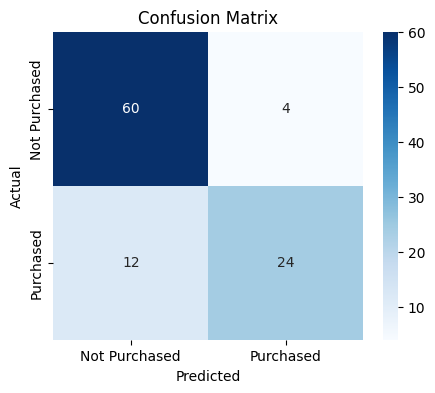

In [16]:
# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Purchased", "Purchased"],
            yticklabels=["Not Purchased", "Purchased"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

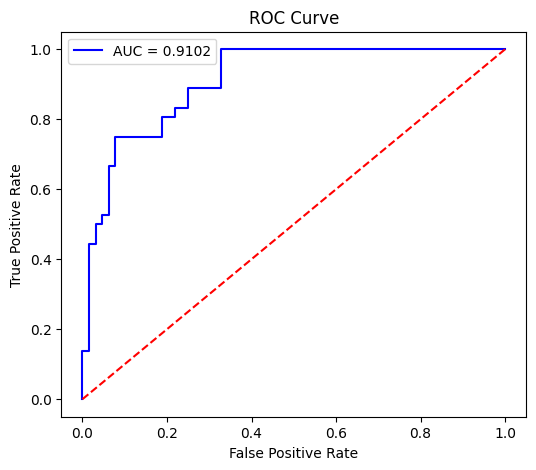

In [17]:
# Step 9: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

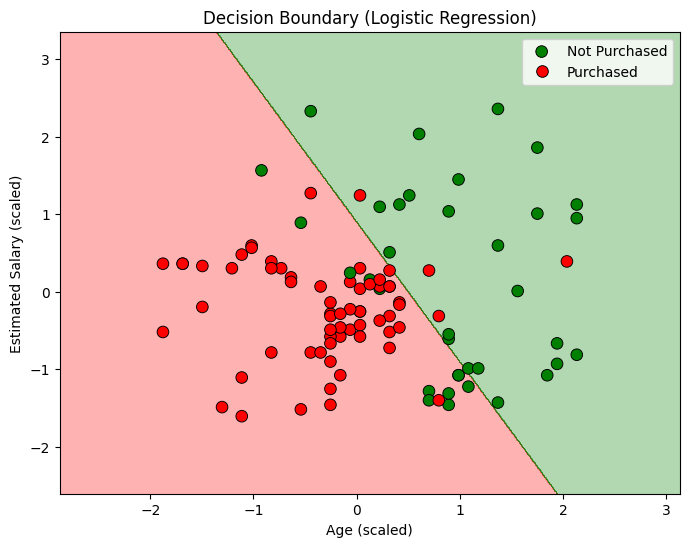

In [18]:
# Step 10: Decision Boundary Visualization
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test  # Use test set for visualization
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
    np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01)
)

plt.figure(figsize=(8,6))
plt.contourf(
    X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.3, cmap=ListedColormap(("red", "green"))
)

# Scatter actual data points
sns.scatterplot(
    x=X_set[:, 0], y=X_set[:, 1], hue=y_set,
    palette={0: "red", 1: "green"}, edgecolor="k", s=70
)

plt.title("Decision Boundary (Logistic Regression)")
plt.xlabel("Age (scaled)")
plt.ylabel("Estimated Salary (scaled)")
plt.legend(["Not Purchased", "Purchased"])
plt.show()
